In [9]:
%matplotlib inline

import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as ml
import numpy
import pandas
import random
import seaborn

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['savefig.dpi'] = 150
seaborn.set_context({"figure.figsize": (16, 24)})

In [2]:
def orient_counts(species):
    data = pandas.read_table('data/{}/{}.iloci.tsv'.format(species, species))
    iiLoci = data.loc[data.LocusClass == 'iiLocus'] 
    return iiLoci['FlankGeneOrient'].value_counts()

In [3]:
def orient_lengths(species):
    data = pandas.read_table('data/{}/{}.iloci.tsv'.format(species, species))
    iiLoci = data.loc[data.LocusClass == 'iiLocus']
    return iiLoci.groupby('FlankGeneOrient')['Length'].quantile([0, 0.25, .5, .75, 1.0])

In [13]:
def plot_length_by_orient(species, name, axis, bins=numpy.linspace(2.5, 6.5, 25), xlab=True, ylab=True):
    data = pandas.read_table('data/{}/{}.iloci.tsv'.format(species, species))
    iiLoci = data.loc[data.LocusClass == 'iiLocus']
    lengths = list()
    labels = ['RF', 'FR']
    for orient in labels:
        lengths.append(numpy.log10(iiLoci.loc[iiLoci.FlankGeneOrient == orient]['Length']))
    _ = axis.hist(lengths, bins=bins)
    _ = axis.set_title(name)
    _ = axis.legend(labels=labels, loc='upper right')
    if xlab:
        _ = axis.set_xlabel('iiLocus Length (bp)')
    if ylab:
        _ = axis.set_ylabel('Frequency')
    _ = axis.set_xticks([3, 4, 5, 6])
    _ = axis.set_xticklabels(['1,000', '10,000', '100,000', '1,000,000'])

In [5]:
for species in ['Scer', 'Cele', 'Crei', 'Atha', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']:
    print(species)
    print(orient_counts(species))
    #print(orient_lengths(species))
    print('')

Scer
RF    137
RR     72
FF     61
FR     19
Name: FlankGeneOrient, dtype: int64

Cele
RR    2211
RF    2172
FF    2114
FR    1286
Name: FlankGeneOrient, dtype: int64

Crei
FR    1923
FF    1530
RR    1469
RF    1326
Name: FlankGeneOrient, dtype: int64

Atha
RF    2837
FF    2761
RR    2377
FR    1301
Name: FlankGeneOrient, dtype: int64

Agam
FF    2039
RR    1974
RF    1974
FR    1737
Name: FlankGeneOrient, dtype: int64

Dmel
FF    994
RF    881
RR    828
FR    733
Name: FlankGeneOrient, dtype: int64

Xtro
RR    5253
FF    5152
FR    4359
RF    3816
Name: FlankGeneOrient, dtype: int64

Drer
RR    6914
FF    6792
FR    5363
RF    4909
Name: FlankGeneOrient, dtype: int64

Mmus
RR    6742
FF    6429
FR    5698
RF    4820
Name: FlankGeneOrient, dtype: int64

Hsap
FF    6193
RR    5962
FR    5584
RF    4503
Name: FlankGeneOrient, dtype: int64



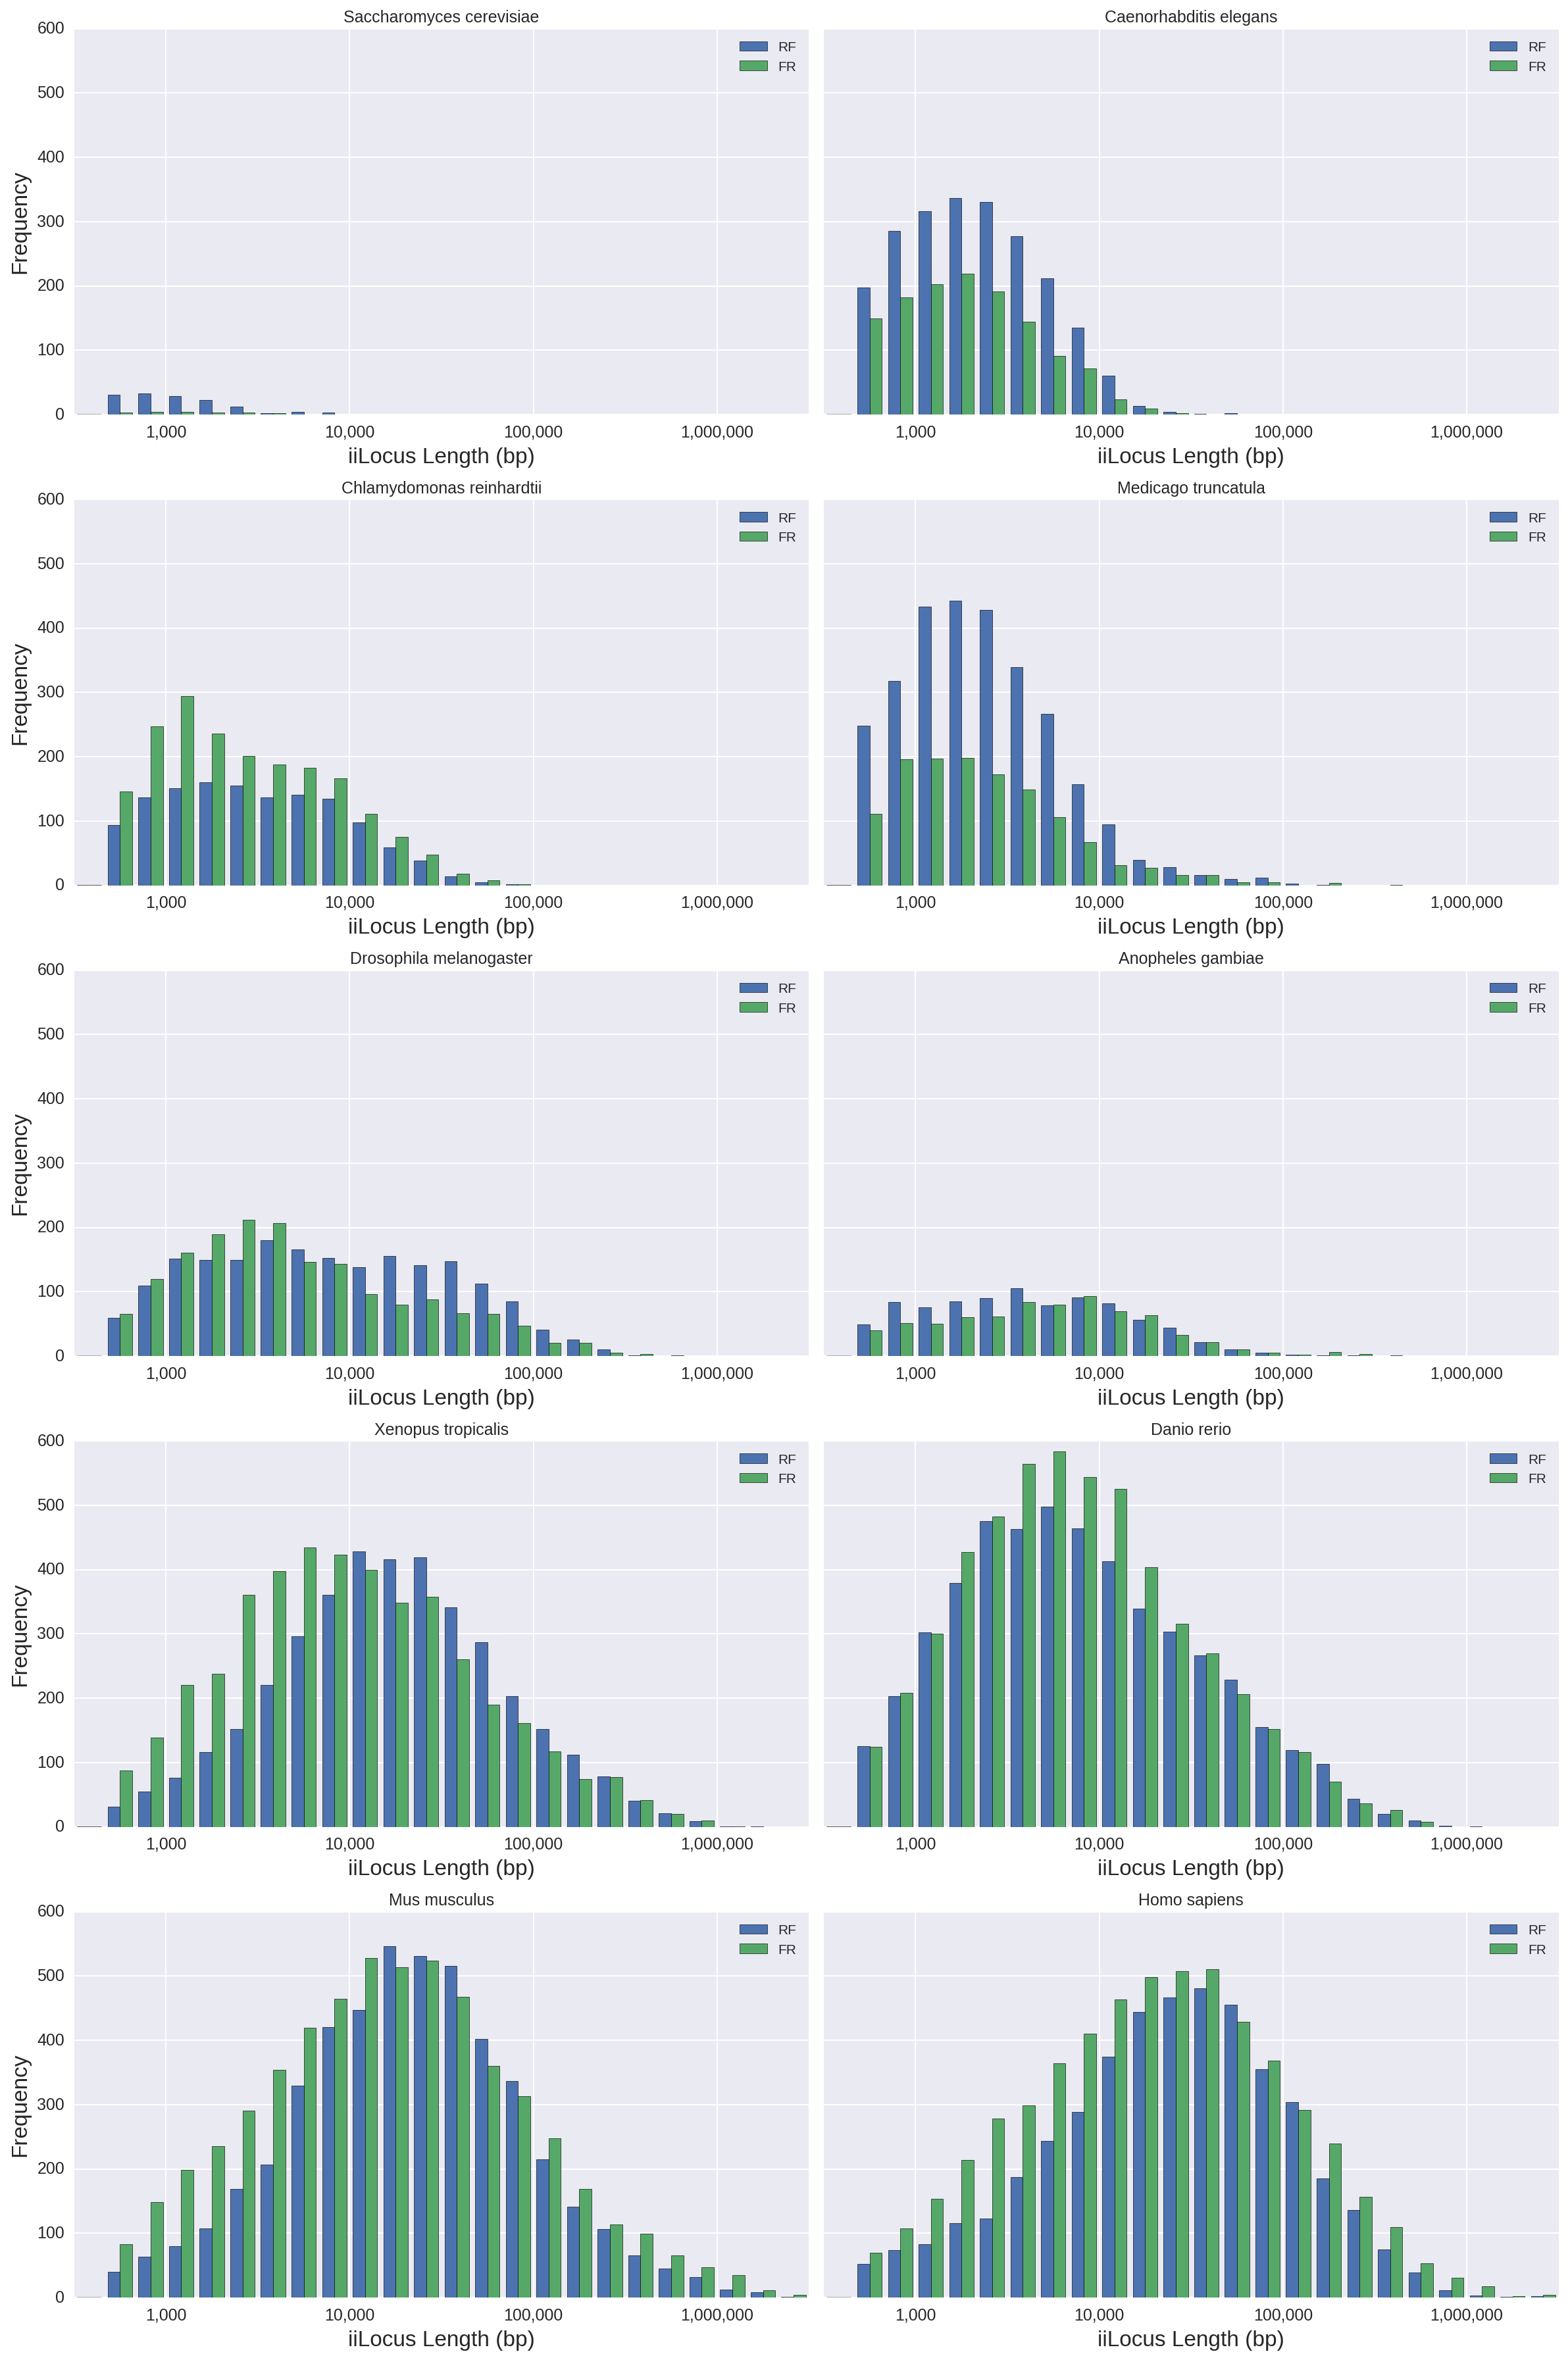

In [14]:
figure, axes = plt.subplots(5, 2, sharey=True)
axes = axes.ravel()
specieslist = ['Scer', 'Cele', 'Crei', 'Atha', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']

ylab = True
for (i, axis), species, name in zip(enumerate(axes), specieslist, speciesnames):
    plot_length_by_orient(species, name, axis, ylab=ylab)
    ylab = not ylab
figure.tight_layout()